In [ ]:
# first way to handle missing values is to remove them it is not preferred
# second way to impute them, fill them
# complete case analysis also called list wise deletion of cases, consist in discarding observations where values in any of variables are misisng
# CCA is applied when less than 5% data is  missing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.isnull()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,False,False,False,False,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,True,False,False
3,False,False,False,True,False,True,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,False,False,False,False,False,False,False,False,False,True,True,False,False
19154,False,False,False,False,False,False,False,False,False,True,True,False,False
19155,False,False,False,False,False,False,False,False,False,False,False,False,False
19156,False,False,False,False,False,False,False,True,False,False,False,False,False


In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
len(df[cols].dropna()) /len(df)

0.8968577095730244

In [12]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

<function matplotlib.pyplot.show(close=None, block=None)>

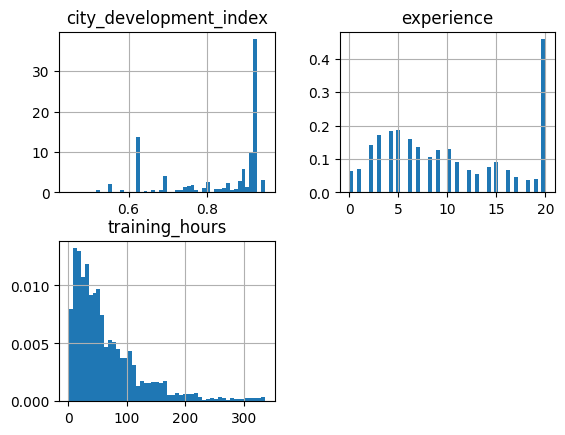

In [13]:
new_df.hist(bins=50, density = True)
plt.show

Before CCA
After CCA


<Axes: >

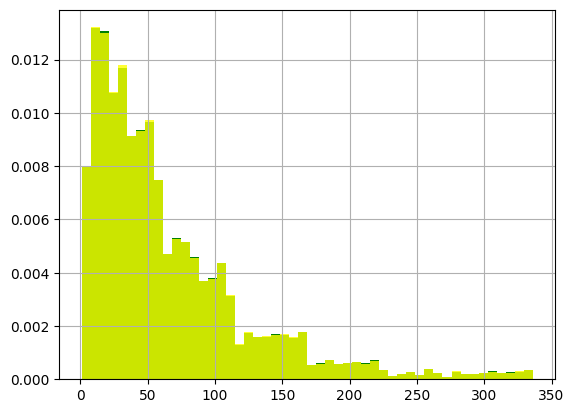

In [19]:
print("Before CCA")
df['training_hours'].hist(bins=50, density=True, color='green')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
print("After CCA")
new_df['training_hours'].hist(bins=50, color='yellow', density=True, alpha=0.8)

Before CCA
After CCA


<Axes: ylabel='Density'>

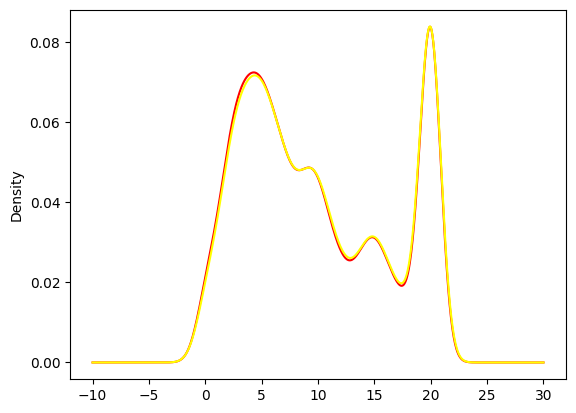

In [21]:
print("Before CCA")
df['experience'].plot.density(color='red')
print("After CCA")
new_df['experience'].plot.density(color='yellow')

In [22]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


<Axes: ylabel='Density'>

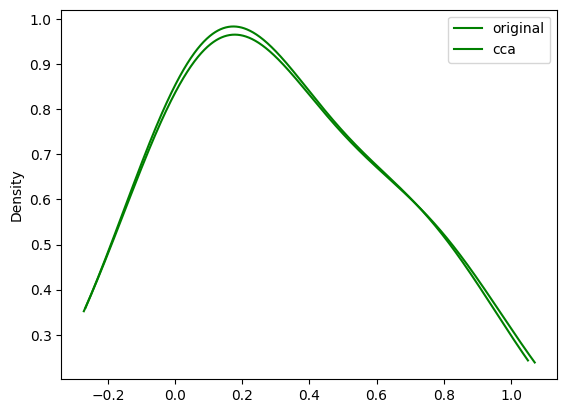

In [26]:
temp[['original','cca']].plot.density(color='green')